<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Customer-churn-in-the-fitness-club" data-toc-modified-id="Customer-churn-in-the-fitness-club-1">Customer churn in the fitness club</a></span></li><li><span><a href="#Step-1.-Data-preprocessing" data-toc-modified-id="Step-1.-Data-preprocessing-2">Step 1. Data preprocessing</a></span></li><li><span><a href="#Step-2.-EDA" data-toc-modified-id="Step-2.-EDA-3">Step 2. EDA</a></span><ul class="toc-item"><li><span><a href="#2.1-Assessment-of-Missing-Features,-Mean-Values,-and-Standard-Deviations" data-toc-modified-id="2.1-Assessment-of-Missing-Features,-Mean-Values,-and-Standard-Deviations-3.1">2.1 Assessment of Missing Features, Mean Values, and Standard Deviations</a></span></li><li><span><a href="#2.2-Average-feature-values-in-the-group-of-customers-who-churned-(churn-=-1)-and-the-group-of-customers-who-stayed-(churn-=-0)" data-toc-modified-id="2.2-Average-feature-values-in-the-group-of-customers-who-churned-(churn-=-1)-and-the-group-of-customers-who-stayed-(churn-=-0)-3.2">2.2 Average feature values in the group of customers who churned (churn = 1) and the group of customers who stayed (churn = 0)</a></span></li><li><span><a href="#2.3-Bar-histograms-and-distributions" data-toc-modified-id="2.3-Bar-histograms-and-distributions-3.3">2.3 Bar histograms and distributions</a></span></li><li><span><a href="#2.4-Correlation-matrix" data-toc-modified-id="2.4-Correlation-matrix-3.4">2.4 Correlation matrix</a></span></li></ul></li><li><span><a href="#Step-3.-Customer-Churn-Prediction-Model" data-toc-modified-id="Step-3.-Customer-Churn-Prediction-Model-4">Step 3. Customer Churn Prediction Model</a></span><ul class="toc-item"><li><span><a href="#3.1-Splitting-the-data-into-a-training-and-validation-set" data-toc-modified-id="3.1-Splitting-the-data-into-a-training-and-validation-set-4.1">3.1 Splitting the data into a training and validation set</a></span></li><li><span><a href="#3.2-Model-training" data-toc-modified-id="3.2-Model-training-4.2">3.2 Model training</a></span></li><li><span><a href="#3.3-Model-metric-evaluation" data-toc-modified-id="3.3-Model-metric-evaluation-4.3">3.3 Model metric evaluation</a></span></li></ul></li><li><span><a href="#Step-4.-Customer-Clustering" data-toc-modified-id="Step-4.-Customer-Clustering-5">Step 4. Customer Clustering</a></span><ul class="toc-item"><li><span><a href="#4.1-Data-Standardization" data-toc-modified-id="4.1-Data-Standardization-5.1">4.1 Data Standardization</a></span></li><li><span><a href="#4.2-Constructing-a-distance-matrix-and-a-dendrogram" data-toc-modified-id="4.2-Constructing-a-distance-matrix-and-a-dendrogram-5.2">4.2 Constructing a distance matrix and a dendrogram</a></span></li><li><span><a href="#4.3-Training-a-clustering-model-using-the-K-Means-algorithm" data-toc-modified-id="4.3-Training-a-clustering-model-using-the-K-Means-algorithm-5.3">4.3 Training a clustering model using the K-Means algorithm</a></span></li><li><span><a href="#4.4-Mean-feature-values-for-the-clusters" data-toc-modified-id="4.4-Mean-feature-values-for-the-clusters-5.4">4.4 Mean feature values for the clusters</a></span></li><li><span><a href="#4.5-Feature-distributions-for-the-clusters." data-toc-modified-id="4.5-Feature-distributions-for-the-clusters.-5.5">4.5 Feature distributions for the clusters.</a></span></li><li><span><a href="#4.6-Churn-rate-for-each-cluster" data-toc-modified-id="4.6-Churn-rate-for-each-cluster-5.6">4.6 Churn rate for each cluster</a></span></li></ul></li><li><span><a href="#Step-5.-Conclusion" data-toc-modified-id="Step-5.-Conclusion-6">Step 5. Conclusion</a></span></li></ul></div>

# Customer churn in the fitness club

The fitness center network is developing a customer interaction strategy based on analytical data.

**Issue**: Customer churn in the fitness club.

**Task**: Conduct an analysis and prepare an action plan for customer retention:

- Learn to forecast the probability of churn (at the next month level) for each customer.
- Create typical customer profiles: identify the most prominent groups and characterize their main attributes.
- Analyze the key features that most strongly influence churn.
- Formulate key findings and develop recommendations for improving customer engagement.

**Data**: Customer surveys.

# Step 1. Data preprocessing

In [1]:
# Import the necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans


pd.set_option('display.max_columns', None)

# disabling scientific notations
pd.options.display.float_format = '{:.2f}'.format 


import warnings
warnings.filterwarnings('ignore')

In [2]:
# open csv file
try:
    df = pd.read_csv('E:\Study_projects\YandexPracticumDataAnalyst\datasets\ml\gym_churn.csv')
except:
    df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
display(df.head(5))
df.info()
print('The number of rough duplicates in the dataframe is equal to', df.duplicated().sum())
print('Missing values in the columns')
df.isna().sum()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

"There are a total of 4,000 records and 14 features. No duplicates or missing data have been identified, and the column types are appropriate."

The dataset includes the following fields:

* **gender** — gender.
* **Near_Location** — whether the customer lives or works in the area where the fitness center is located.
* **Partner** — whether the customer is an employee of a partner company of the club (partnership with companies whose employees can get discounts on memberships).
* **Promo_friends** — whether the customer initially signed up through the "bring a friend" promotion (used a promo code from a friend when paying for the first membership).
* **Phone** — whether the customer has a contact phone number.
* **Age** — age.
* **Lifetime** — the time since the first visit to the fitness center (in months).

Information based on visit logs, purchases, and the current status of the customer's subscription includes the following fields:

* **Contract_period** — the duration of the current active subscription (month, 6 months, year).
* **Month_to_end_contract** — the remaining term of the current active subscription (in months).
* **Group_visits** — whether the customer attends group classes.
* **Avg_class_frequency_total** — the average visit frequency per week since the beginning of the subscription.
* **Avg_class_frequency_current_month** — the average visit frequency per week in the previous month.
* **Avg_additional_charges_total** — the total revenue from other services provided by the fitness center, such as the cafe, sports goods, cosmetic and massage services.
* **Churn** — the fact of customer churn in the current month.

Let's convert the column names to lowercase:

In [4]:
df.columns = [i.lower() for i in df]

Summary: In the first step, the provided data was analyzed, checked for missing values and duplicates, and the column names were converted to lowercase.

# Step 2. EDA

## 2.1 Assessment of Missing Features, Mean Values, and Standard Deviations

In [5]:
print('Description of Features and the Target Variable::')
display(df.describe().T)

Description of Features and the Target Variable::


,count,mean,std,min,25%,50%,75%,max
gender,4000.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,4000.00,0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,4000.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,4000.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,4000.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,4000.00,4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,4000.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,4000.00,29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,4000.00,146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,4000.00,4.32,4.19,1.00,1.00,1.00,6.00,12.00


Conclusion:

* The distribution of gender is roughly equal (49% male, 51% female, and it's not specified which gender is represented as 1).
* Most customers (85%) live or work near the fitness club.
* Approximately half of the customers (49%) come to the club through partner programs offered by their employers.
* About a third (31%) of the customers received their first subscription through the "Bring a Friend" program.
* Mobile numbers are provided by approximately 90% of customers, while 10% prefer not to provide their numbers.
* The average contract duration (contract_period) is 4.6 months, and the average time remaining on the contract (month_to_end_contract) is 4.3 months. This suggests that customers are more inclined to enter into relatively long-term contracts, but typically not exceeding a year.
* 41% of customers attend group classes.
* The average age of customers is 29 years, with a maximum age of 41 years and a minimum age of 18.
* On average, the fitness club generates 146 units of additional revenue from each customer, but the maximum value in the dataset is 552 (currency units are not specified in the documentation).
* The average time since the customer's first visit to the fitness center is 3.7 months.
* The average visit frequency per week since the beginning is 1.88 times a week.
* The average visit frequency per week in the last month is 1.77 times a week.
* The churn rate is 27%.

## 2.2 Average feature values in the group of customers who churned (churn = 1) and the group of customers who stayed (churn = 0)

In [6]:
display(df.groupby('churn').mean().T)

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


Summary of the comparison of average feature values:
* The "gender" and "phone" features are the same in both groups.
* Customers who live or work near the club are slightly less likely to churn.
* Employees of partner companies are less likely to churn compared to other customers.
* Customers who joined through the "Bring a Friend" promotion are twice as likely to stay and not churn.
* Customers who do not churn visit the club more frequently (an average of 2 times a week compared to 1 time a week for those who churn), attend group classes more often (almost twice as often), and spend more money on additional services (158 units vs. 115 units).
* Customers who churn have much shorter contract durations (average of 1.7 months) and shorter times remaining on their contracts (1.6 months) compared to those who continue to visit the club (5.7 months and 5.2 months, respectively). It seems that customers who churn tend to opt for shorter contract durations.
* Customers who churn are on average younger than those who stay (27 years vs. 30 years).

## 2.3 Bar histograms and distributions

Let's build distributions of quantitative features for those who churned (churn) and those who stayed (did not churn).

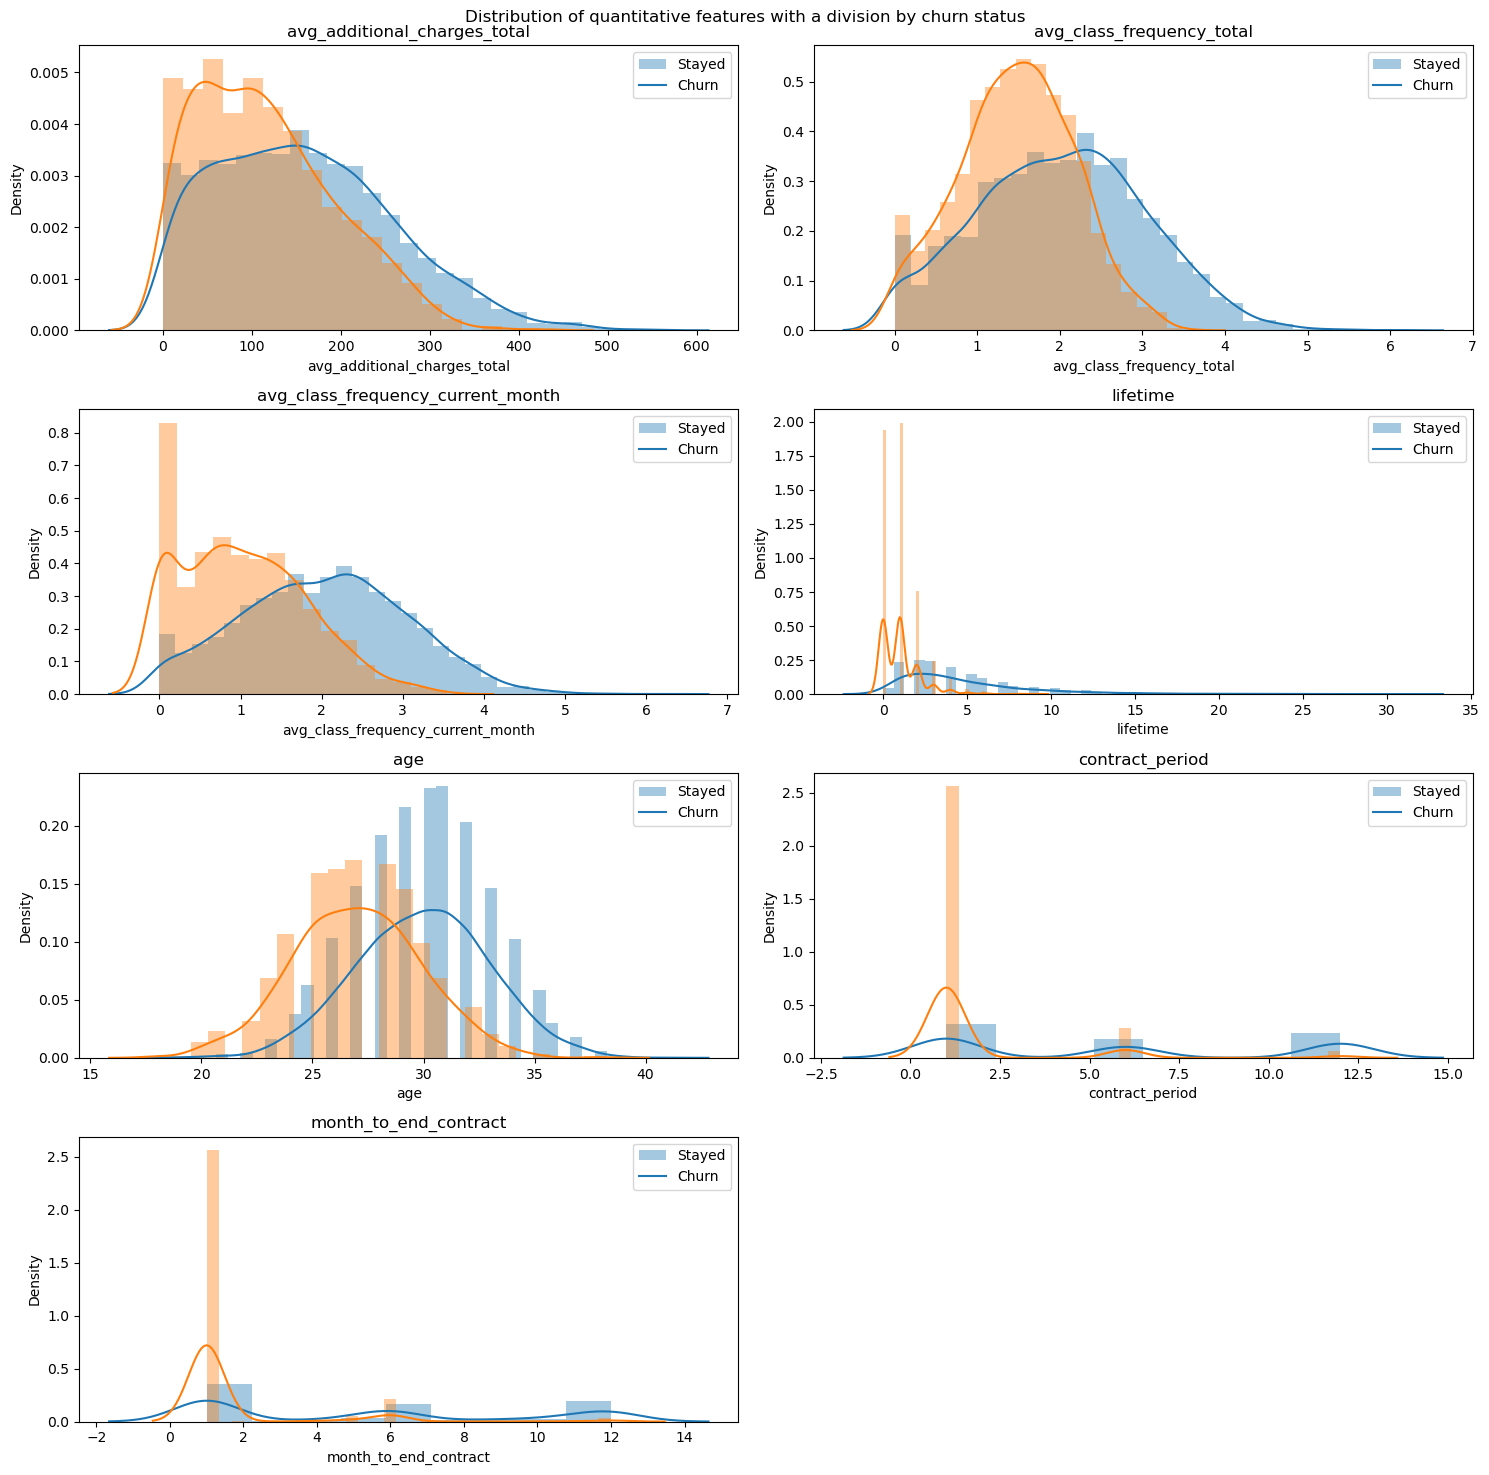

In [7]:
# list of quantitative features
params = ['avg_additional_charges_total', 
          'avg_class_frequency_total', 
          'avg_class_frequency_current_month', 
          'lifetime', 
          'age', 
          'contract_period', 
          'month_to_end_contract']

# graphic properties
col_count, row_count = 2, 4
plt.figure(figsize = (15, 15))


for i, param in enumerate(params):
    for x in df['churn'].unique():
        current = df.query('churn == @x')
        sns.distplot(current[param], label = x,
                    ax = plt.subplot(row_count, col_count, i + 1)
                    )
       
        plt.title(param)
        plt.legend(['Stayed', 'Churn'])
        
plt.suptitle('Distribution of quantitative features with a division by churn status')
plt.tight_layout()

The differences observed in the graphs confirm the conclusions made earlier:
* Patients in the churn group spend less money, visit the club less frequently, are younger, and more often sign shorter-term contracts.

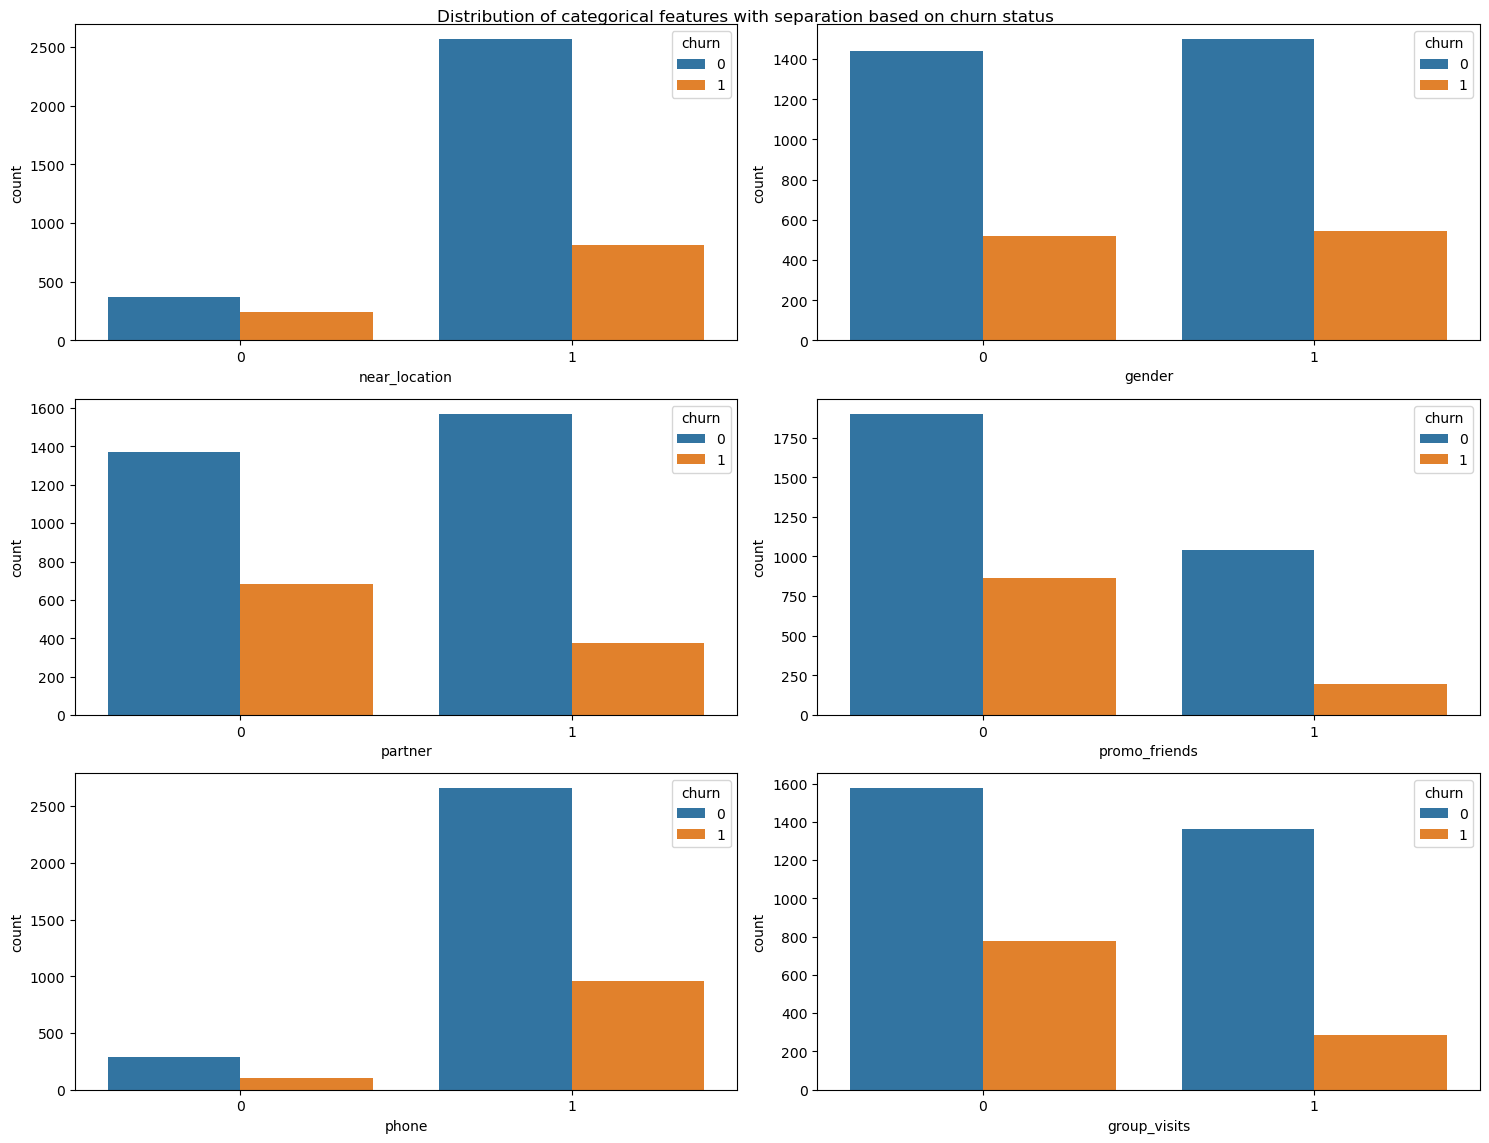

In [8]:
# Building Bar Histograms for Categorical Features 
params = ['near_location', 'gender', 'partner', 'promo_friends', 'phone', 'group_visits']

# graphic properties
col_count, row_count = 2, 4
plt.figure(figsize = (15, 15))


for i, param in enumerate(params):
    sns.countplot(x = df[param], hue='churn', data=df,
                    ax = plt.subplot(row_count, col_count, i + 1)
                    )
        
plt.suptitle('Distribution of categorical features with separation based on churn status')
plt.tight_layout()

Conclusions:
* Customers who live or work near the club tend to stay with the club more often.
* The "gender" and "phone" features do not significantly influence churn.
* Customers who joined the club through a partner program are less likely to churn. However, the proportion of churned customers who joined through a partner program is much smaller than the proportion of non-churned customers who joined through the program.
* Customers who churn are much less likely to have joined through the "Bring a Friend" program.
* Customers who churn are much less likely to attend group classes.

## 2.4 Correlation matrix

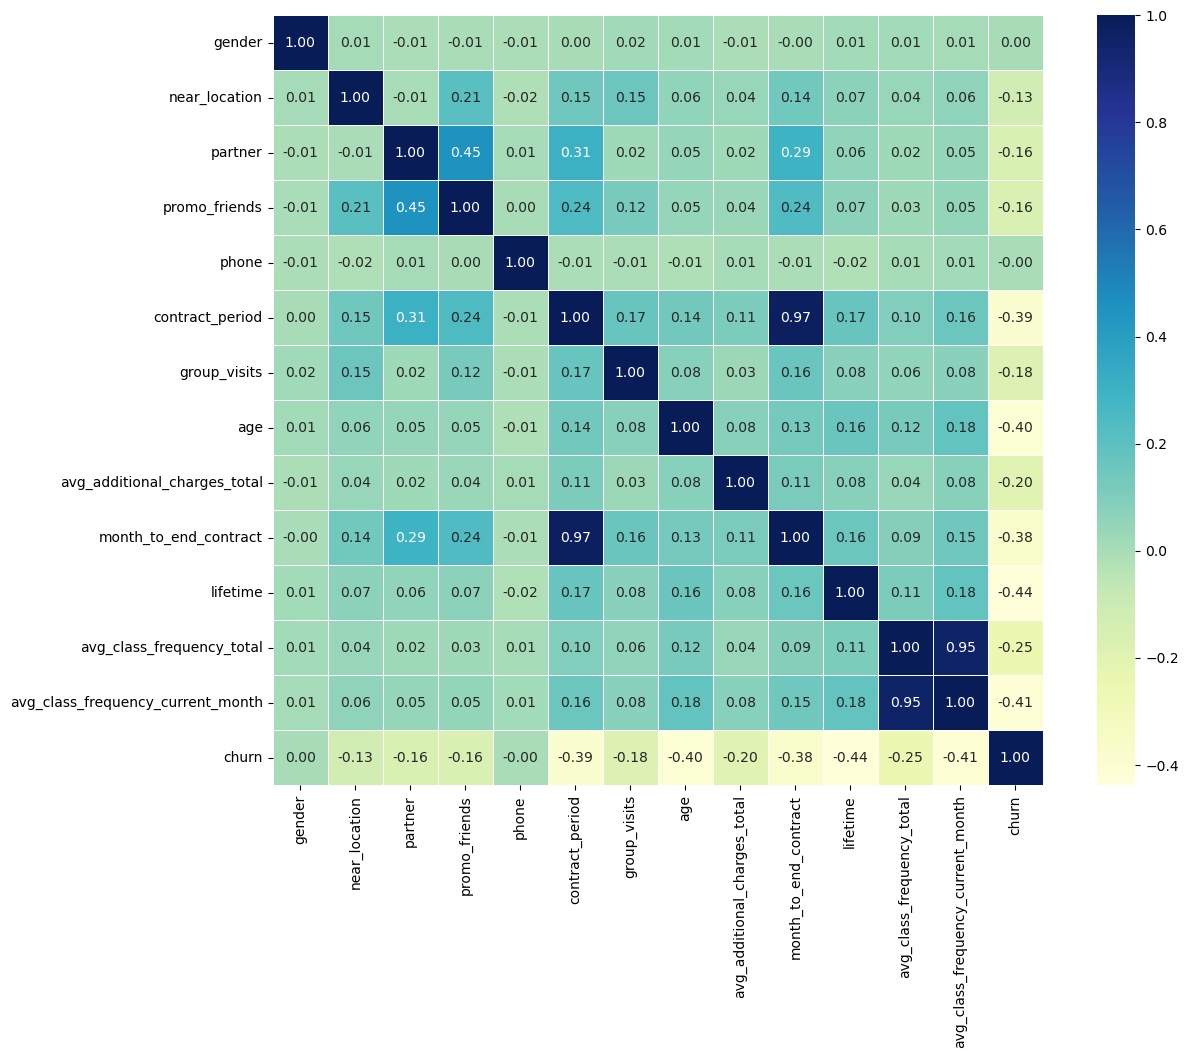

In [9]:
# calculate correlation matrix
cm = df.corr()

# build heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap="YlGnBu", square=True)
plt.show()

**Conclusion**:

Highly correlated features:

* The features "month_to_end_contract" and "contract_period" are strongly correlated. This might indicate multicollinearity, meaning they provide similar information about the length of the contract.

* The features "avg_class_frequency_total" and "avg_class_frequency_month" are strongly correlated. Both features provide information about visit frequency but over different time periods.

Moderate correlations:

* The "promo_friends" feature is moderately correlated with "partner" (possibly because employees receive promo codes from their employers), "near_location" (indicating word-of-mouth referrals), "contract_period," and "month_to_end_contract" (the explanation for this correlation is not clear).

Zero correlation with the target variable "churn":

* The features "phone" and "gender" show zero correlation with the target variable.

Correlation with the target variable "churn":

* The strongest correlations with the target variable "churn" are observed for the features "contract_period," "month_end_to_contract" (as long as the subscription is paid, customers tend to continue visiting), "lifetime" (the longer a customer attends, the lower the probability of churning), "age," and "avg_class_frequency_current_month" (more frequent attendance at group classes correlates with a lower likelihood of ceasing activity).

On the second step, an exploratory analysis was conducted, and it led to the hypothesis that the most influential features in predicting churn are **contract_period, month_end_to_contract, lifetime, age, and avg_class_frequency_current_month**.

# Step 3. Customer Churn Prediction Model

You need to build a binary classification model for customers, where the target feature is the fact of customer churn in the next month

## 3.1 Splitting the data into a training and validation set

We split the data into a training and validation set using the train_test_split() function in an 80 to 20 ratio

In [10]:
# We separate the data into features (matrix X) and the target variable (y)
X = df.drop('churn', axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We will also perform data 'centering' and 'standardization' by scaling the data. Scaling is done because different variables are expressed in different units of measurement. This is a necessary step when working with the K-means algorithm

In [11]:
# scaling data
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

## 3.2 Model training

We will train a logistic regression model.

In [12]:
# Specify the algorithm for the logistic regression model
lr_model_st = LogisticRegression(random_state=0)

# train the model on the training set
lr_model_st.fit(X_train_st, y_train)

#  evaluate the model on the validation set
lr_predictions_st = lr_model_st.predict(X_test_st)

# use the already trained model to make predictions
lr_probabilities_st = lr_model_st.predict_proba(X_test_st)[:,1]

Now, let's train the model using the Random Forest algorithm:

In [13]:
rf_model_st = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model_st.fit(X_train_st, y_train)
rf_predictions_st = rf_model_st.predict(X_test_st)
rf_probabilities_st = rf_model_st.predict_proba(X_test_st)[:,1]

## 3.3 Model metric evaluation

Evaluate the metrics of **accuracy, precision, recall, and f1-score** for both models on the validation set.

In [14]:
# A function that displays metrics for binary classification models, 
# taking the target variable from the validation set and the model's predictions as input
def show_metrics(y_test, predictions):
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
    print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
            
    return

In [15]:
for pred in [lr_predictions_st, rf_predictions_st]:
    show_metrics(y_test, pred)
    print()

Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84

Accuracy: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83



The logistic regression model performed the best. It's possible that with additional experiments regarding the number of trees or depth in the random forest model, higher performance could be achieved

Let's evaluate which features each model considers to be the most important: 

In [16]:
# transform the 'coef_' attribute into a DataFrame, sort it in descending order, and display it on the screen
features_lr = pd.DataFrame(lr_model_st.coef_.T, X.columns).reset_index()
features_lr.columns = ['feature', 'coef']
features_lr['coef'] = features_lr['coef'].apply(lambda x: abs(x))
features_lr = features_lr.sort_values(by='coef', ascending=False)
print('The coefficients of the features in the logistic regression model:')
print(features_lr)

The coefficients of the features in the logistic regression model:
                              feature  coef
12  avg_class_frequency_current_month  4.45
10                           lifetime  3.85
11          avg_class_frequency_total  3.30
7                                 age  1.09
5                     contract_period  0.72
8        avg_additional_charges_total  0.55
9               month_to_end_contract  0.53
6                        group_visits  0.39
3                       promo_friends  0.28
2                             partner  0.08
1                       near_location  0.08
0                              gender  0.01
4                               phone  0.00


In [17]:

features_rf = pd.DataFrame(rf_model_st.feature_importances_.T, X.columns).reset_index()
features_rf.columns = ['feature', 'coef']
features_rf['coef'] = features_rf['coef'].apply(lambda x: abs(x))
features_rf = features_rf.sort_values(by='coef', ascending=False)
print('The feature importances in the random forest model:')
print(features_rf)

The feature importances in the random forest model:
                              feature  coef
10                           lifetime  0.28
12  avg_class_frequency_current_month  0.18
11          avg_class_frequency_total  0.13
7                                 age  0.12
8        avg_additional_charges_total  0.09
9               month_to_end_contract  0.07
5                     contract_period  0.07
6                        group_visits  0.02
0                              gender  0.01
2                             partner  0.01
3                       promo_friends  0.01
1                       near_location  0.01
4                               phone  0.01


Both models consider the features lifetime and avg_class_frequency_month to be important

# Step 4. Customer Clustering

## 4.1 Data Standardization

Let's prepare the data for the K-Means algorithm. First, it's necessary to perform the required data standardization on the feature matrix (churn has already been dropped)

In [18]:
X_st = scaler.fit_transform(X)

## 4.2 Constructing a distance matrix and a dendrogram

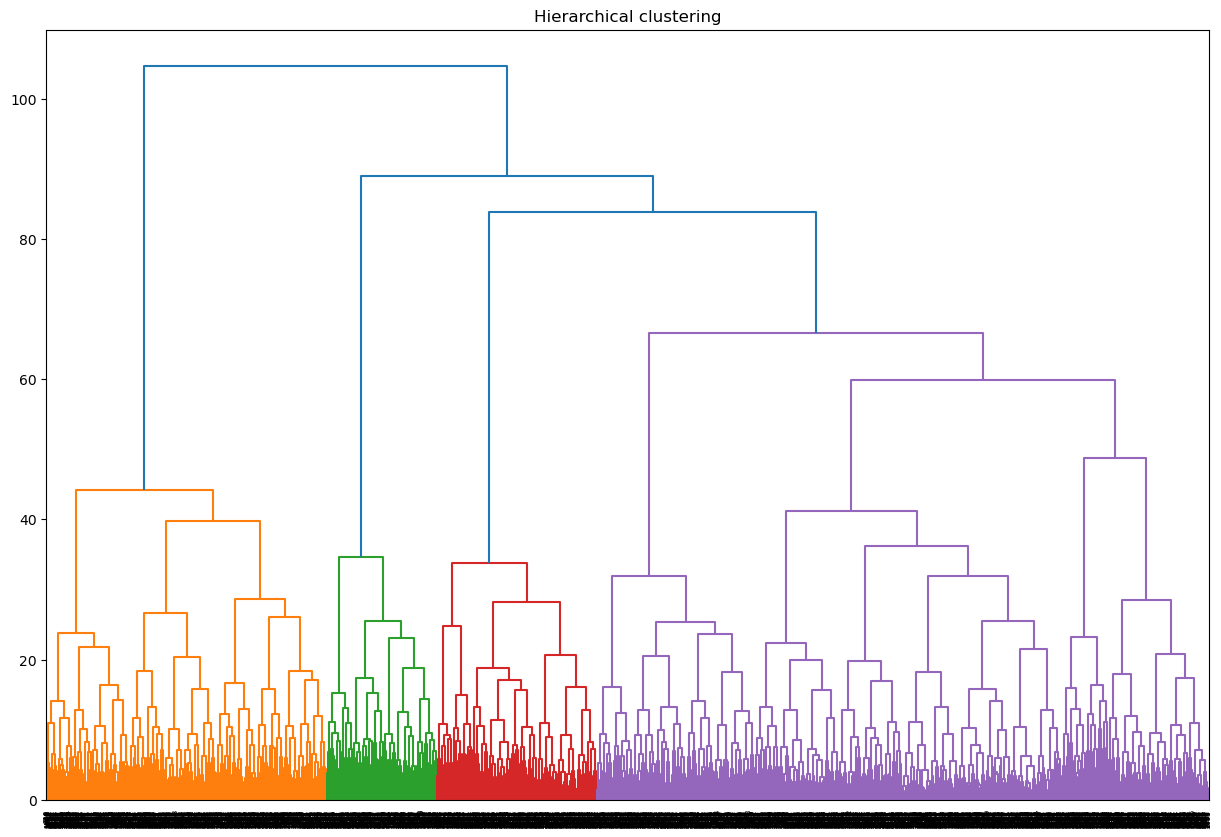

In [19]:
# The variable 'linked' contains the linkage matrix, which can be visualized as a dendrogram
linked = linkage(X_st, method='ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering')
plt.show() 

Conclusion:
* The dendrogram clearly highlights 4 clusters of different colors.
* The 4th cluster is the largest, and it's possible that it can be further divided into more clusters. 

## 4.3 Training a clustering model using the K-Means algorithm

In [25]:
# We set the number of clusters to 4 and fix the random_state value for result reproducibility
km = KMeans(n_clusters=4, random_state=0) 
labels = km.fit_predict(X_st)

# We save the cluster labels in the column of dataset
df['cluster_km'] = labels

## 4.4 Mean feature values for the clusters 

In [26]:
display(df.groupby('cluster_km').mean().T)

cluster_km,0,1,2,3
gender,0.52,0.50,0.55,0.49
near_location,0.86,0.94,0.86,0.76
partner,0.47,0.78,0.34,0.38
promo_friends,0.31,0.57,0.20,0.19
phone,0.00,1.00,1.00,1.00
contract_period,4.78,10.69,2.39,1.89
group_visits,0.43,0.53,0.45,0.29
age,29.30,29.90,30.02,28.03
avg_additional_charges_total,144.21,161.10,157.47,129.64
month_to_end_contract,4.47,9.76,2.22,1.80


**Cluster 0**:

* Churn rate: 27%
* The only cluster not providing a phone number.
* In most features, they occupy an intermediate position between all clusters.

**Cluster 1**:

* Churn rate: 3% - the lowest.
* Live or work near the fitness club.
* Most often sign contracts through a partner company or with a promo code.
* Sign the longest contracts.
* Attend group classes more frequently.
* Spend the most on additional services.

**Cluster 2**:

* Churn rate: 9%.
* Visit the club more frequently than others.
* Sign short contracts but attend group classes and purchase additional services.

**Cluster 3**:

* The highest churn rate: 56%.
* Least likely to live or work near the fitness club.
* Sign the shortest contracts with the fitness club.
* Attend group classes at the club less frequently than others.
* The youngest clients.
* Spend the least on additional services.

## 4.5 Feature distributions for the clusters.

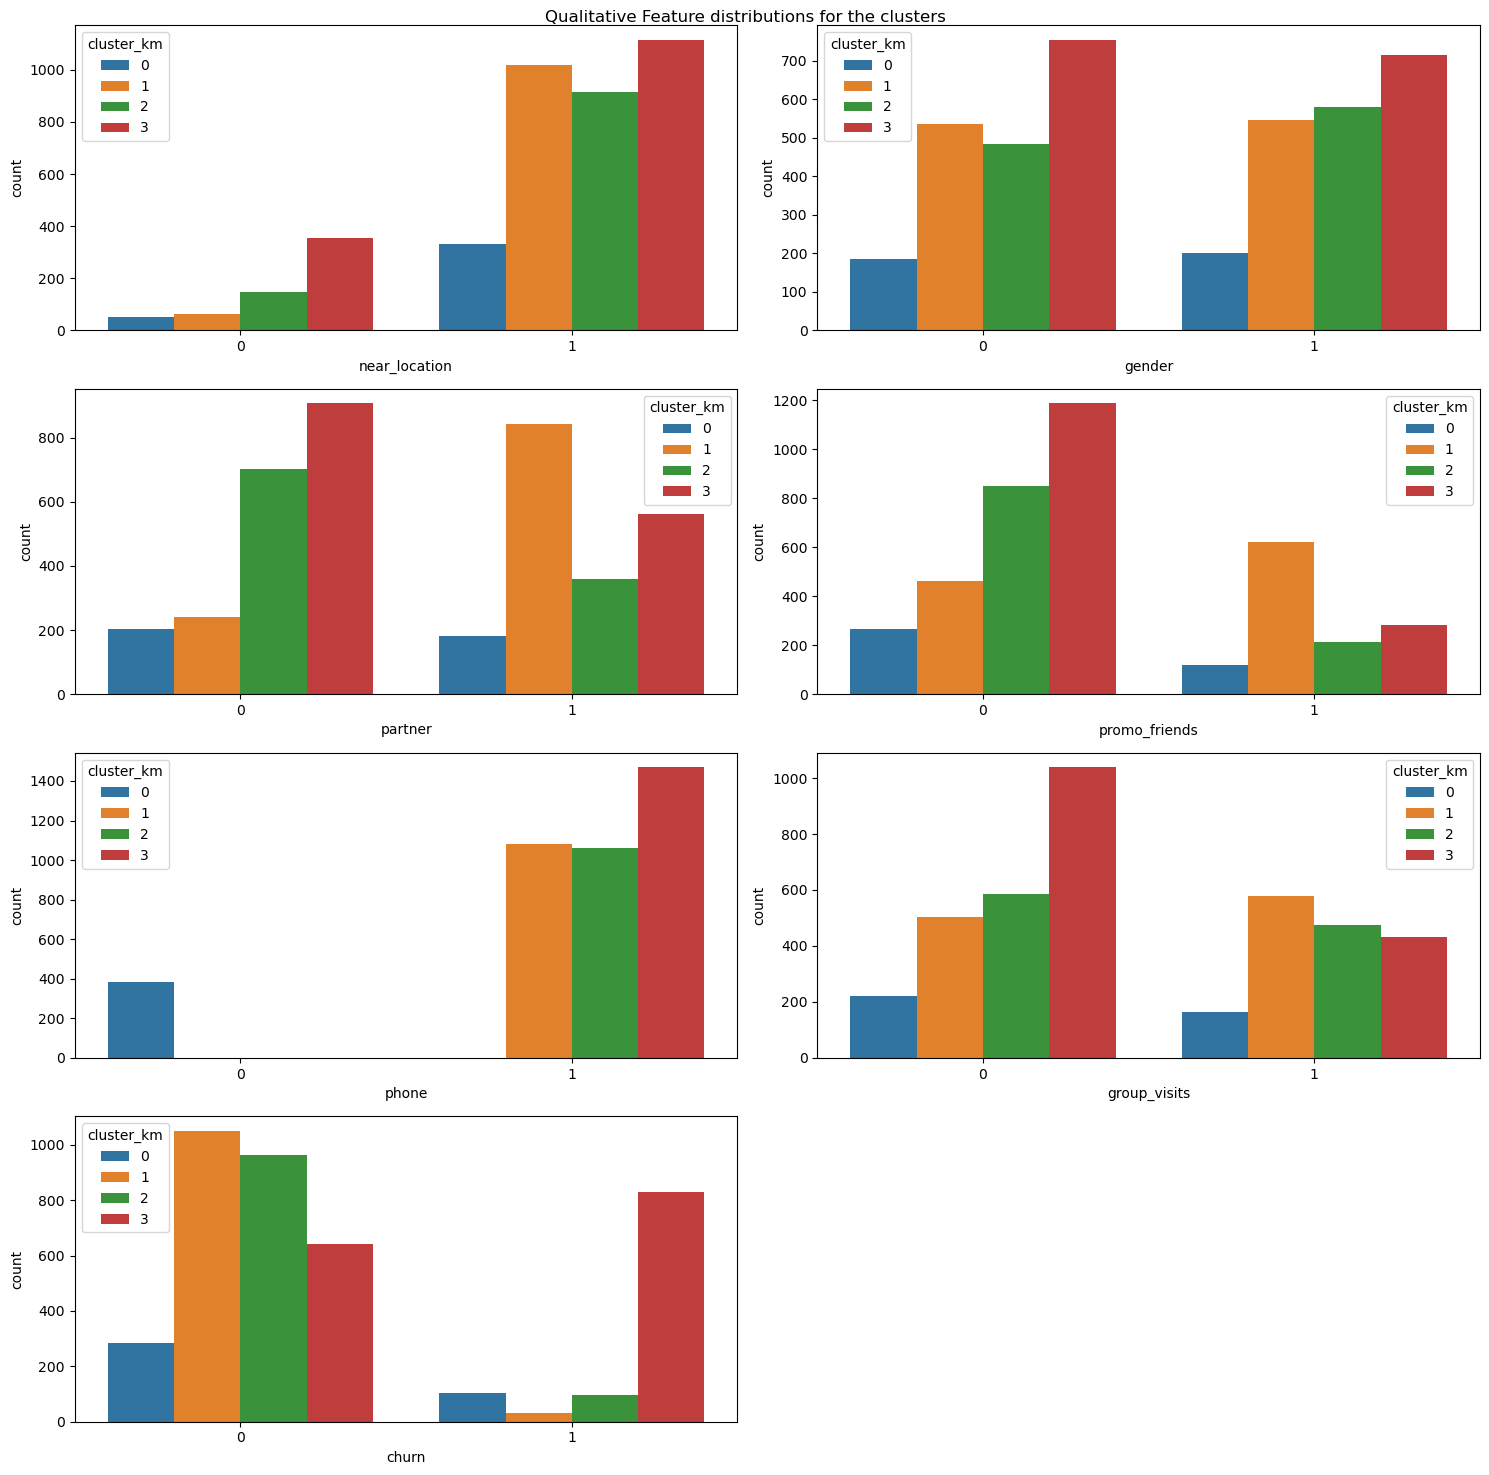

In [30]:
# list the qualitative features 
params = ['near_location', 'gender', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']

# graph's characteristics
col_count, row_count = 2, 4
plt.figure(figsize = (15, 15))


for i, param in enumerate(params):
    sns.countplot(x = df[param], hue='cluster_km', data=df,
                    ax = plt.subplot(row_count, col_count, i + 1)
                    )
        
plt.suptitle('Qualitative Feature distributions for the clusters')
plt.tight_layout()

**Proximity to home**:
* Cluster 3 is the only one not characterized by this feature.

**Gender**:
* No differences are observed among clusters.

**Company partner**:
* Least characteristic for cluster 3.
* Most characteristic for cluster 1.

First visit with a 'Bring a Friend' promo code:
* Least characteristic for cluster 3.
* Most characteristic for cluster 1.

**Mobile phone**:
* Only cluster 0 is characterized by its absence.

**Group class attendance**:
* Least characteristic for cluster 3.

**Churn**:
* Least characteristic for cluster 1.
* Most characteristic for cluster 3.

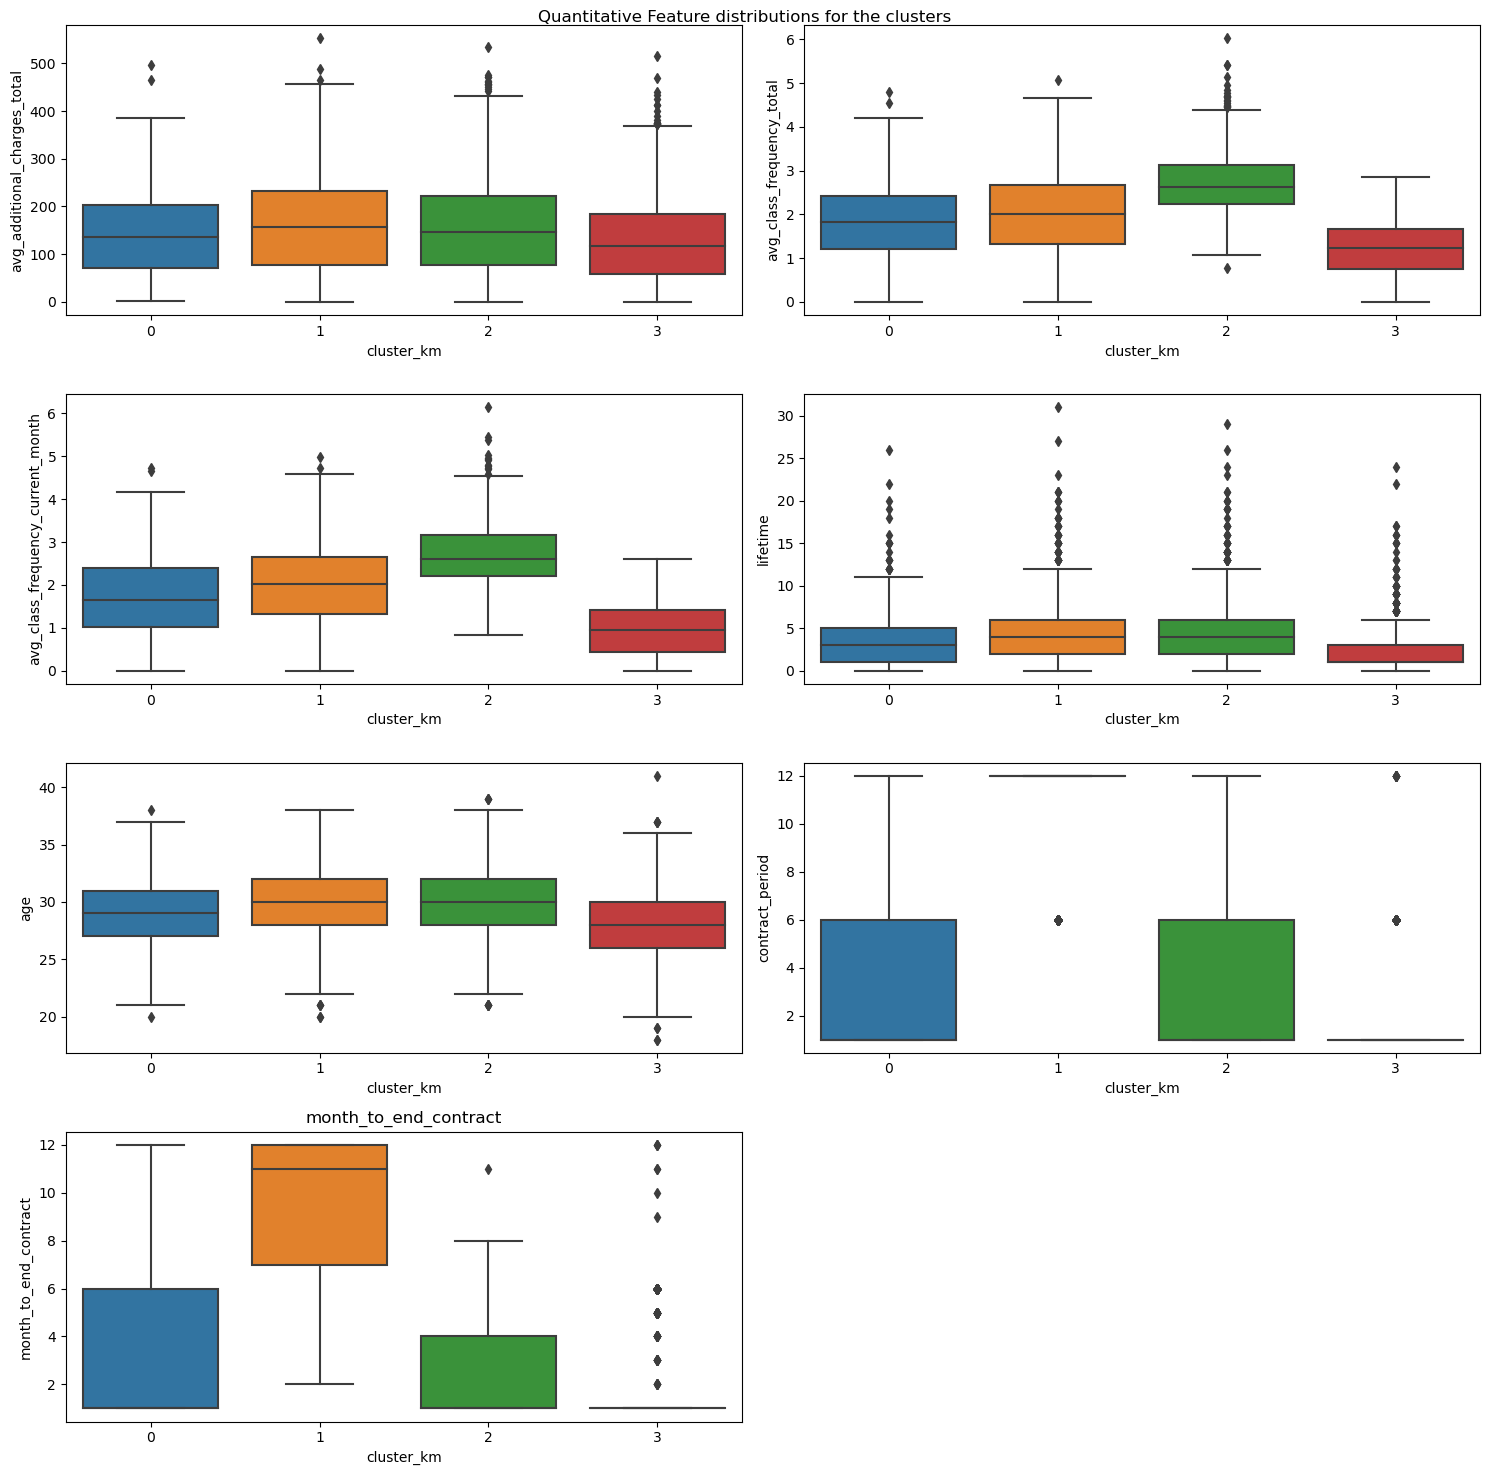

In [31]:
#  list the quantitative features.
params = ['avg_additional_charges_total', 
          'avg_class_frequency_total', 
          'avg_class_frequency_current_month', 
          'lifetime', 
          'age', 
          'contract_period', 
          'month_to_end_contract']


col_count, row_count = 2, 4
plt.figure(figsize = (15, 15))


for i, param in enumerate(params):
    sns.boxplot(x = 'cluster_km', y = df[param], data = df, 
                ax = plt.subplot(row_count, col_count, i + 1))
    
plt.title(param)
plt.suptitle('Quantitative Feature distributions for the clusters')
plt.tight_layout()

Conclusion:
* The longest contracts are with clients in cluster 1.
* Clients in cluster 2 visit the club most frequently.
* The shortest contracts are with clients in cluster 3, while the longest contracts are with clients in cluster 1.

## 4.6 Churn rate for each cluster

In [29]:
display(df.groupby('cluster_km')['churn'].mean().sort_values(ascending=False).T)

cluster_km
3   0.56
0   0.27
2   0.09
1   0.03
Name: churn, dtype: float64

Let's evaluate the churn rate for each cluster. The leader is cluster 3 with a churn rate of 56%. Cluster 0 has the second-highest churn rate at 27%. The lowest churn rate is in cluster 1, with only 3%, while cluster 2 has a 9% churn rate

# Step 5. Conclusion

At the first stage of the analysis, the provided data was processed. In the second stage, an exploratory data analysis was conducted. The average values of features for all fitness club customers were examined:
* The gender distribution is approximately equal (49% male and 51% female, with no indication of which gender is considered 1).
* The majority of customers (85%) live or work near the fitness club.
* Approximately half of the customers (49%) come to the club through partner programs offered by employers.
* About a third (31%) of customers obtained their first subscription through the "Bring a Friend" program.
* Approximately 90% of customers have provided mobile phone numbers, with 10% choosing not to disclose.
* The average contract period (contract_period) is 4.6 months, and the average time remaining until the contract expires (month_to_end_contract) is 4.3 months. It can be assumed that customers are more inclined to sign contracts with the fitness club for relatively long terms, but not exceeding one year.
* 41% of customers attend group classes.
* The average age of customers is 29 years. The maximum age is 41 years, and the minimum age is 18.
* On average, the fitness club generates 146 units of additional revenue per customer through the sale of services, but the maximum value in the database is 552 (the dimension and currency are not specified in the documentation).
* The average time since the first visit to the fitness center is 3.7 months.
* The average visit frequency per week over all time is 1.88 times per week.
* The average visit frequency per week for the last month is 1.77 times per week.
* The churn rate is 27%

Then, the average indicators were compared between the churn group and the non-churn group:
* The "gender" and "mobile phone" features are the same in both groups.
* Customers living or working near the club are slightly less likely to churn.
* Employees of partner companies are less likely to churn compared to other customers.
* Customers who came through the "Bring a Friend" promotion are twice as likely to stay and not churn.
* Non-churning customers visit the club more frequently (an average of 2 times per week versus 1 time per week for churn customers), attend group classes more often (almost twice as often), and spend more money on additional services (158 units versus 115 units).
* Churning customers have much shorter contract durations (an average of 1.7 months) and time left on their contracts (1.6 months) compared to customers who continue to use the club (5.7 months and 5.2 months, respectively). It seems that churn customers tend to sign shorter-term contracts.
* On average, churn customers are younger (27 years old) compared to non-churn customers (30 years old).

On the third step, binary classification models were built for predicting customer churn in the following month. Logistic regression and random forest models were trained. Both models consider the features "lifetime" and "avg_class_frequency_month" as important. The metrics of the logistic regression model were found to be better than those of the RandomForest model.

On the fourth step, customer clustering was conducted using the K-Means method. The following customer clusters were identified:

**Cluster 0**:

* Churn rate: 27%
* The only cluster not providing a phone number.
* In most features, they occupy an intermediate position between all clusters.

**Cluster 1**:

* Churn rate: 3% - the lowest.
* Live or work near the fitness club.
* Most often sign contracts through a partner company or with a promo code.
* Sign the longest contracts.
* Attend group classes more frequently.
* Spend the most on additional services.

**Cluster 2**:

* Churn rate: 9%.
* Visit the club more frequently than others.
* Sign short contracts but attend group classes and purchase additional services.

**Cluster 3**:

* The highest churn rate: 56%.
* Least likely to live or work near the fitness club.
* Sign the shortest contracts with the fitness club.
* Attend group classes at the club less frequently than others.
* The youngest clients.
* Spend the least on additional services.

Consequently, the implementation of the customer clustering task allowed for the formation of typical customer profiles by identifying several distinct groups and characterizing their key attributes. It also helped analyze the primary features that most strongly influence customer churn, which was one of the objectives of the analysis.

Key factors influencing churn include short-term contract durations, infrequent club visits and group classes, and the absence of a mobile phone number in the user's profile.

Evaluation of the churn rate for each cluster was conducted. The leader is cluster 3 with a churn rate of 56%. Cluster 0 has the second-highest churn rate at 27%. The lowest churn rate is in cluster 1, with only 3%, while cluster 2 has a 9% churn rate.

At the 5th stage, after drawing conclusions, recommendations were developed to improve customer management:
1) Identify target customer groups:
* Cluster 1 (employees of partner companies) - the most loyal audience with the lowest churn rate. It is recommended to focus efforts on retaining these users.
* Pay attention to Cluster 2 - customers who frequently visit the club and actively use additional services. They are also less prone to churn.

2) Propose measures to reduce churn:
* Problematic clusters include Cluster 3, characterized by infrequent club visits, lower participation in group classes, and fewer customers coming through referral programs. Efforts should be directed towards increasing club visits, particularly after the first two months.
* Cluster 0 has an intermediate churn rate, but its only distinguishing feature is that users have not provided their mobile phone numbers. It might be sufficient to collect these phone numbers to reduce churn by improving customer engagement.